In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\ML Projects\Regression1_Laptop_Price\laptopPrice.csv")

In [4]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df.shape

(823, 19)

In [7]:
df.describe(include = 'all')
#There are outliers in all 3 numerical columns. (Compare 75% and max-there's a huge difference)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
count,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823.000000,823,823.000000,823.000000
unique,8,3,11,8,4,6,7,4,3,2,5,3,4,2,2,NaN,5,NaN,NaN
top,ASUS,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,NaN,4 stars,NaN,NaN
freq,249,610,290,334,418,709,398,621,779,714,577,520,509,726,542,NaN,444,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76745.177400,NaN,315.301337,37.609964
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45101.790525,NaN,1047.382654,121.728017
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16990.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46095.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64990.000000,NaN,17.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89636.000000,NaN,139.500000,18.000000


In [8]:
df.isna().sum()
#no columns with null value

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [9]:
df.duplicated().sum()

21

In [10]:
df = df.drop_duplicates()

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Numerical features: ", numeric_features)
print("Categorical featues:", cat_features)

Numerical features:  ['Price', 'Number of Ratings', 'Number of Reviews']
Categorical featues: ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


In [12]:
df.shape

(802, 19)

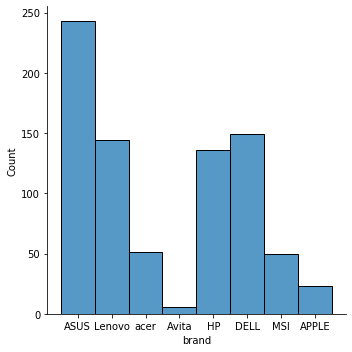

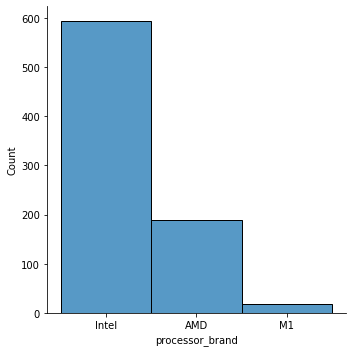

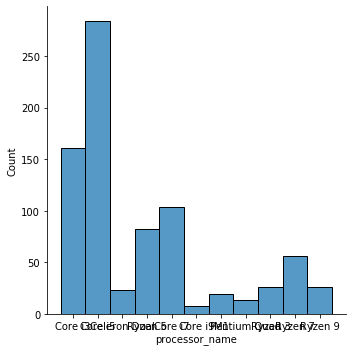

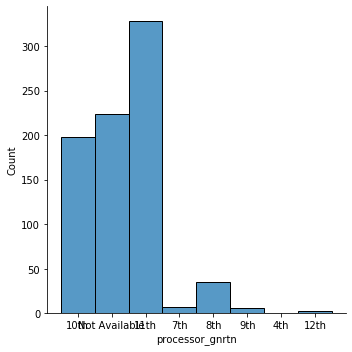

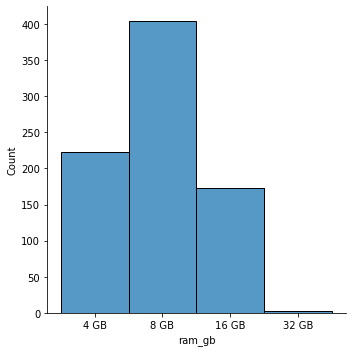

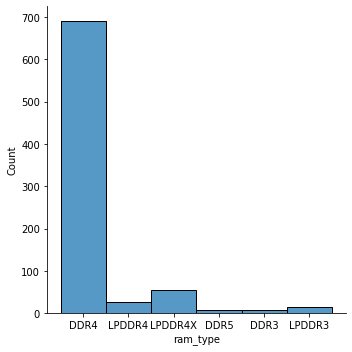

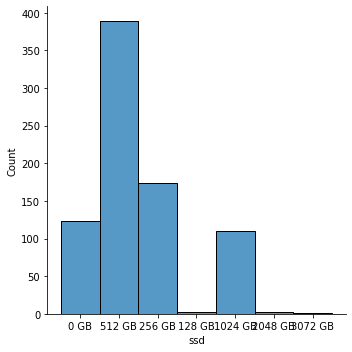

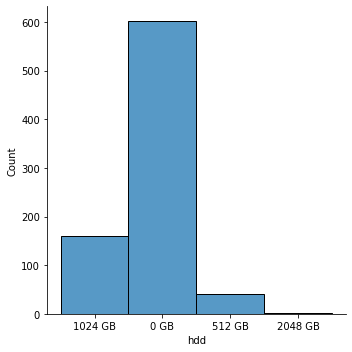

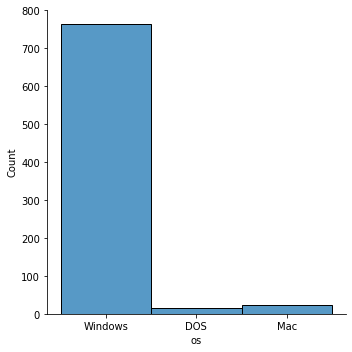

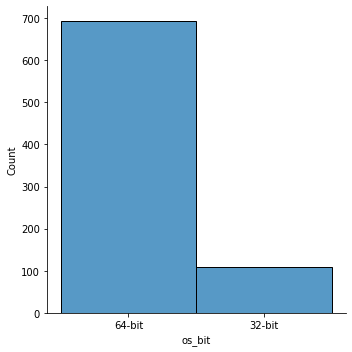

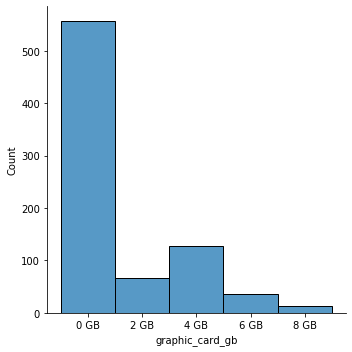

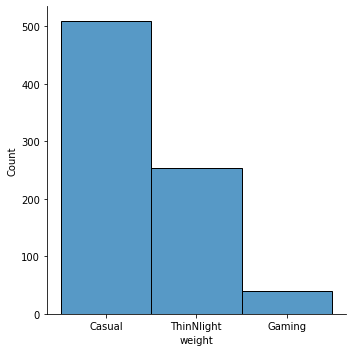

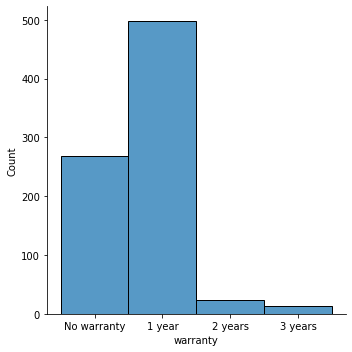

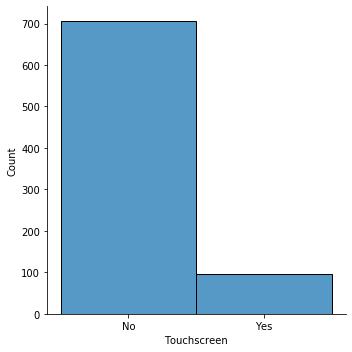

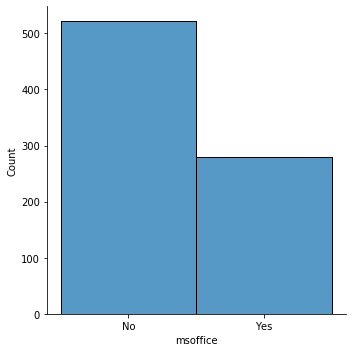

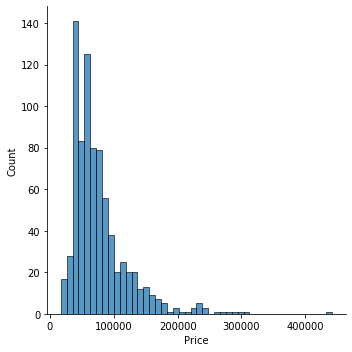

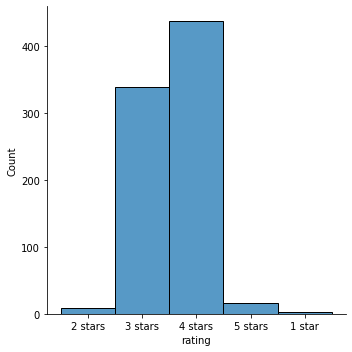

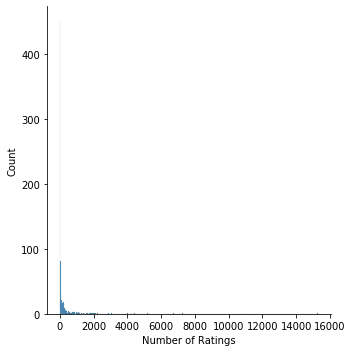

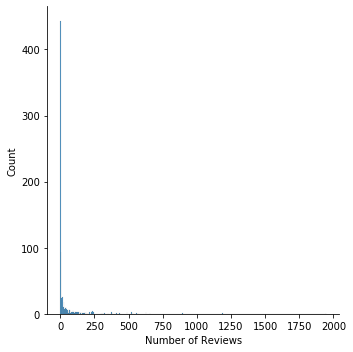

In [15]:
import seaborn as sns
for x in df.columns:
    sns.displot(df[x])

In [16]:
#By above graphs, we noticed that there are a lot of "Not Available" present in processor generation column.
#so we are going to replace it with most common value of that column.
df['processor_gnrtn'].replace('Not Available', df['processor_gnrtn'].mode()[0], inplace=True)

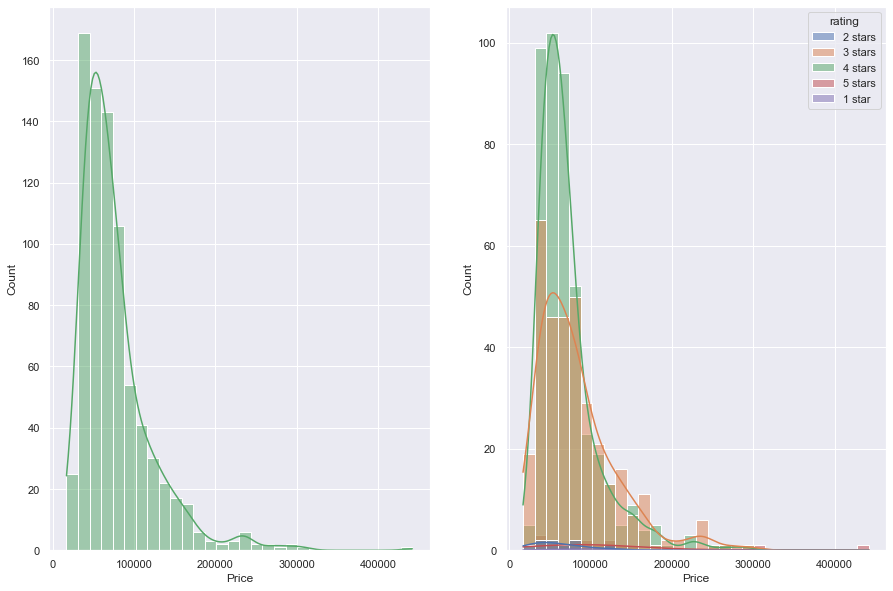

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(121)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g', hue= 'rating')
plt.show()

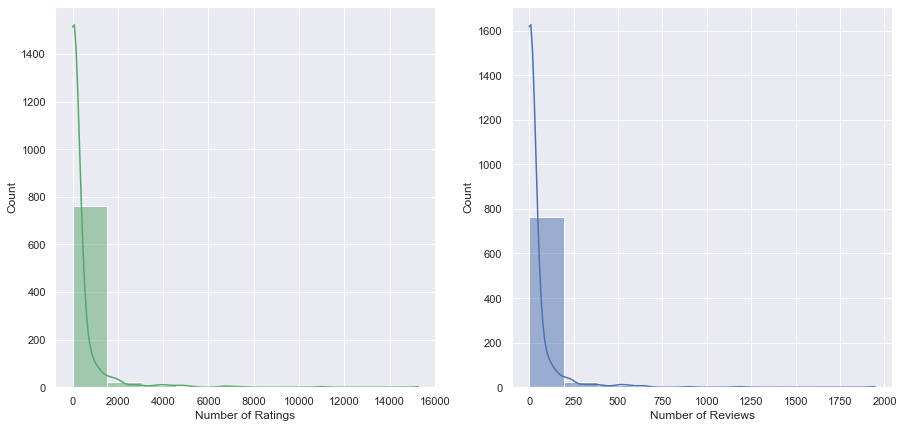

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Number of Ratings',bins=10,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Number of Reviews',kde=True, bins = 10)
plt.show()

In [19]:
def remove_outliers(df, column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df
df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Number of Ratings')
df = remove_outliers(df, 'Number of Reviews')

In [20]:
df.shape

(527, 19)

In [21]:
df.describe(include = 'all')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
count,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527.000000,527,527.000000,527.000000
unique,8,3,11,6,3,6,5,3,3,2,5,3,4,2,2,NaN,5,NaN,NaN
top,ASUS,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,NaN,3 stars,NaN,NaN
freq,172,402,211,392,268,452,281,415,517,451,380,341,322,448,342,NaN,287,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72235.751423,NaN,16.979127,1.998102
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29280.929189,NaN,26.115376,3.015485
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21990.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49384.500000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65556.000000,NaN,5.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86994.500000,NaN,23.500000,3.000000


In [22]:
#Another way to remove outliers
#q = df['Price'].quantile(0.99) 
#df = df[df['Price']<q]

#q = df['Number of Reviews'].quantile(0.99) 
#df = df[df['Number of Reviews']<q]

#We removed outliers from both independent(x) and dependent(y) columns.

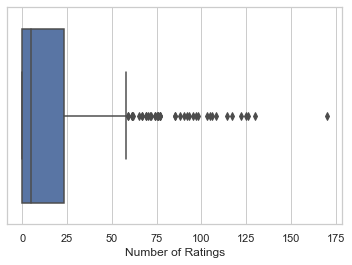

In [23]:
sns.set_style("whitegrid")

sns.boxplot(x=df["Number of Ratings"]);

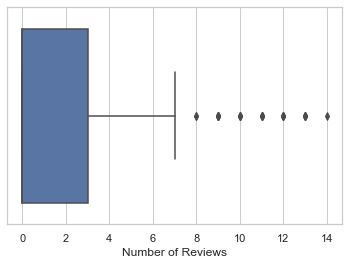

In [24]:
sns.boxplot(x=df["Number of Reviews"]);

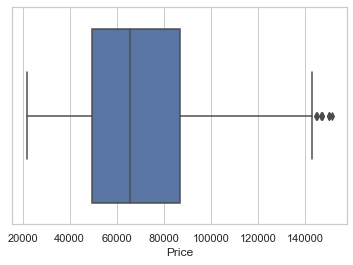

In [25]:
sns.boxplot(x=df["Price"]);

In [26]:
#Most of the laptops have between 0 and 25 number of ratings and 0 and 3 number of reviews.
#And price for most of the laptops is somewhere between 50,000 and 85,000

In [28]:
X = df.loc[:,df.columns != "Price"]
y = df['Price']

In [29]:
df.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        6
ram_gb                 3
ram_type               6
ssd                    5
hdd                    3
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                298
rating                 5
Number of Ratings     87
Number of Reviews     15
dtype: int64

In [30]:
#How many rows in each category of brand?
df['brand'].value_counts()

ASUS      172
DELL      111
Lenovo    104
HP         76
acer       34
MSI        23
Avita       4
APPLE       3
Name: brand, dtype: int64

In [31]:
#ASUS is the most popular brand in this dataset.

In [33]:
#Encoding categorical columns
X=pd.get_dummies(X,columns=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 
                            'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 
                            'Touchscreen', 'msoffice', 'rating'],drop_first=True)
X

,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,processor_brand_Intel,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,3,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,65,5,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,8,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
819,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
820,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
821,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
#To convert whatever strings dataset might contain to numeric values. 
#If they're incompatible with conversion, they'll be reduced to NaNs.
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
#Furthermore, we can fill those values with some default.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [39]:
#Preprocessing is needed for both train and test sets. 
#But you should not do data leakage, 
# i.e no information from the test set should be used to preprocess the training set.

#For example, if you are trying to apply One-Hot encoding to your classification labels you should train the encoder 
#(e.g. sklearn.preprocessing.OneHotEncoder) on training set and apply the trained encoder to get the labels for test set.

#Or if you want to normalize a feature, 
#calculate the mean and standard deviation from the training set and use it to normalize both training and test sets.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
X_test = scaler.transform(X_test)
y_pred = lm.predict(X_test)

In [42]:
predictions = lm.predict(X_test)

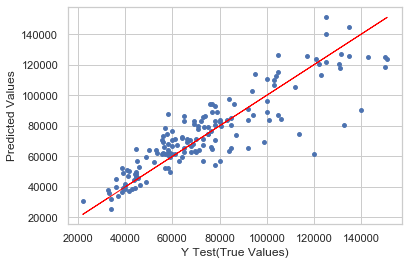

In [43]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#What range of values of MAE,MSE,RMSE is ideal?

MAE: 10001.075471698114
MSE: 192193347.72955975
RMSE: 13863.381540214485


In [45]:
print('Variance:', metrics.explained_variance_score(y_test, predictions))
#Variance: Variance- around 76%
#Variance (or R-squared) evaluates the scatter of the data points around the fitted regression line. Higher R-squared values represent smaller differences between the observed data and the fitted values.
#R-squared is always between 0 and 100%:
#00% represents a model that explains all the variation in the response variable around its mean.
#Here we have around 76%, which is a fairly decent I think.

Variance: 0.7663462655370126
